In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
bc_df = pd.read_csv("Glass.csv")
random = bc_df.sample(n=10)
random

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
122,123,1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.00,0.00,2
137,138,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00,2
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
153,154,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.00,0.00,3
194,195,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7
117,118,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00,2
123,124,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.00,0.00,2
48,49,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.00,0.00,1
54,55,1.51778,13.21,2.81,1.29,72.98,0.51,9.02,0.00,0.09,1


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [3]:
# Nothing to replace.
bc_df.isnull().values.any()

False

## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


In [4]:
bc_df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

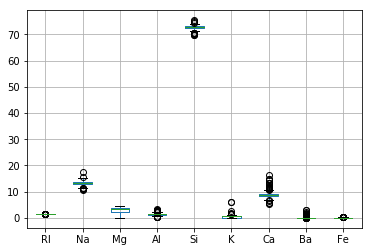

In [5]:
boxplot = bc_df.boxplot(column=['RI', 'Na', 'Mg','Al','Si', 'K', 'Ca','Ba', 'Fe'])

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [6]:
bc_df.var()

Id number        3834.166667
RI                  0.000009
Na                  0.666841
Mg                  2.080540
Al                  0.249270
Si                  0.599921
K                   0.425354
Ca                  2.025366
Ba                  0.247227
Fe                  0.009494
Type of glass       4.425716
dtype: float64

In [7]:
# Drop "Id number" as it has no influence on the Model
bc_df = bc_df.drop(labels = "Id number", axis = 1)
# Drop "RI" as variance is less than 0.1
bc_df = bc_df.drop(labels = "RI", axis = 1)
# Drop "Fe" as variance is less than 0.1
bc_df = bc_df.drop(labels = "Fe", axis = 1)
# Create a separate dataframe consisting only of the features i.e independent attributes
bc_feature_df = bc_df.drop(labels= "Type of glass" , axis = 1)

In [8]:
bc_df.var()

Na               0.666841
Mg               2.080540
Al               0.249270
Si               0.599921
K                0.425354
Ca               2.025366
Ba               0.247227
Type of glass    4.425716
dtype: float64

In [9]:
bc_feature_df

,Na,Mg,Al,Si,K,Ca,Ba
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00
5,12.79,3.61,1.62,72.97,0.64,8.07,0.00
6,13.30,3.60,1.14,73.09,0.58,8.17,0.00
7,13.15,3.61,1.05,73.24,0.57,8.24,0.00
8,14.04,3.58,1.37,72.08,0.56,8.30,0.00
9,13.00,3.60,1.36,72.99,0.57,8.40,0.00


## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

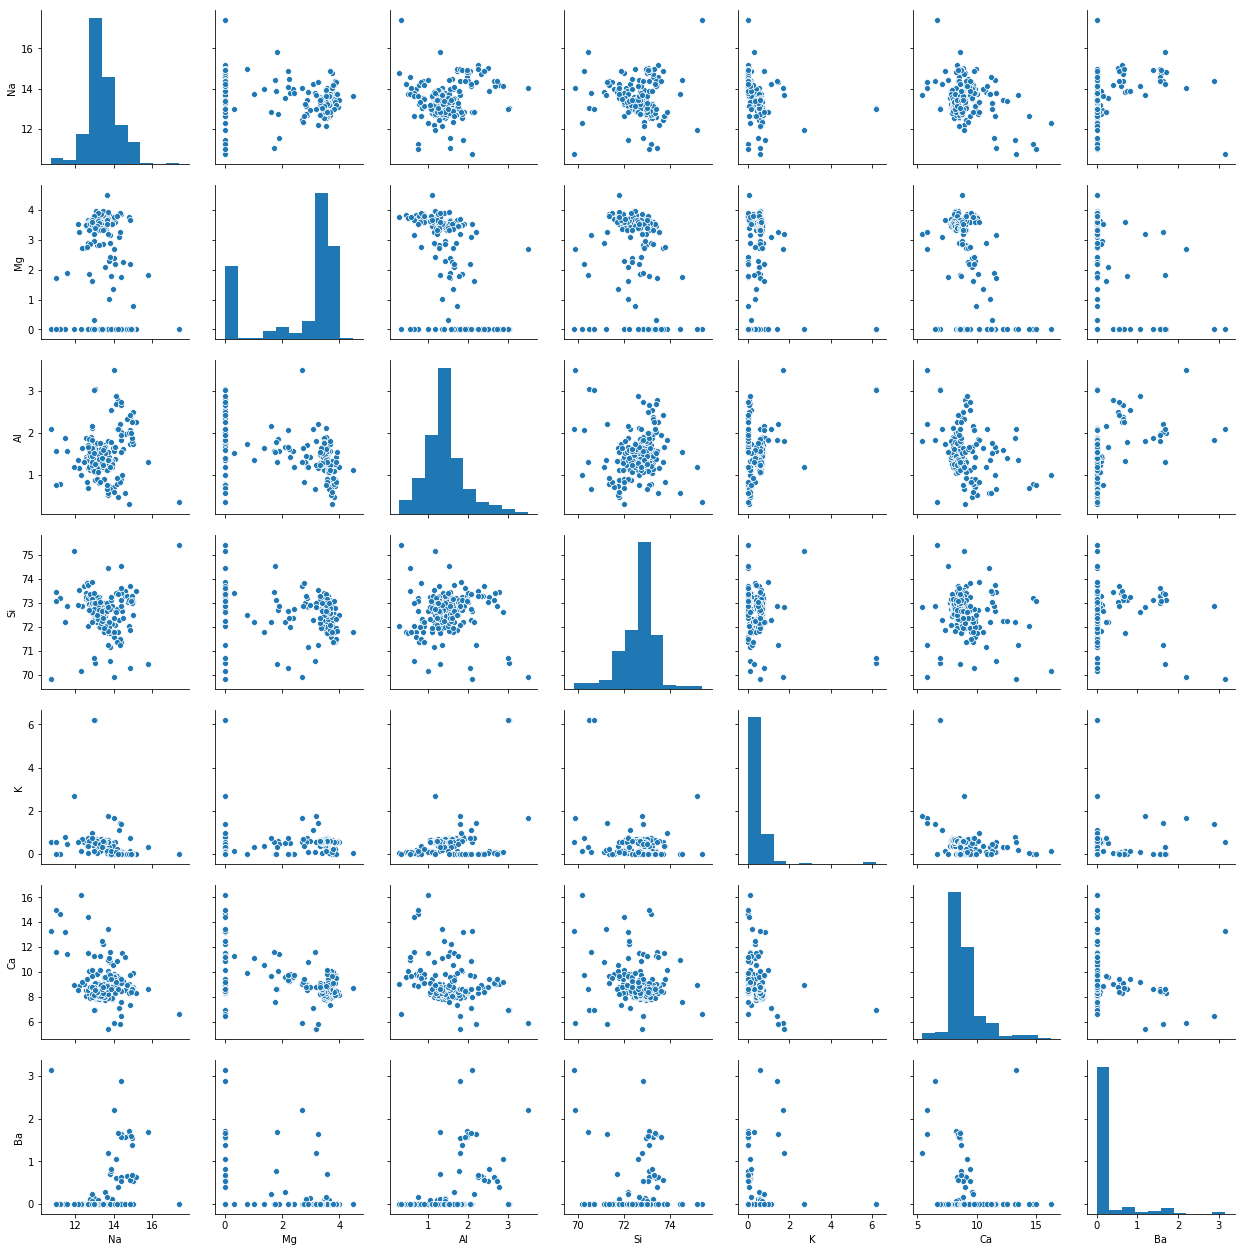

In [10]:
# Plot scatter matrix for all independent variables/attributes.
sns.pairplot(bc_feature_df)

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [11]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

bc_feature_df_z = bc_feature_df.apply(zscore)  # convert all attributes to Z scale 

bc_feature_df_z.describe()

,Na,Mg,Al,Si,K,Ca,Ba
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01
25%,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01
50%,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01
75%,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01
max,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00


In [12]:
# Capture the class values from the 'Type of glass' column into a pandas series akin to array 

bc_labels = bc_df["Type of glass"]
bc_labels

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
184    6
185    7
186    7
187    7
188    7
189    7
190    7
191    7
192    7
193    7
194    7
195    7
196    7
197    7
198    7
199    7
200    7
201    7
202    7
203    7
204    7
205    7
206    7
207    7
208    7
209    7
210    7
211    7
212    7
213    7
Name: Type of glass, Length: 214, dtype: int64

In [13]:
# store the normalized features data into np array 
X = np.array(bc_feature_df_z)
X

array([[ 0.28495326,  1.25463857, -0.69244192, ..., -0.67170546,
        -0.14576634, -0.35287683],
       [ 0.59181718,  0.63616803, -0.17046023, ..., -0.02621325,
        -0.79373376, -0.35287683],
       [ 0.14993314,  0.60142249,  0.19091171, ..., -0.16453301,
        -0.82894938, -0.35287683],
       ...,
       [ 1.16872135, -1.86551055,  1.15457021, ..., -0.76391864,
        -0.36410319,  2.95320036],
       [ 1.19327046, -1.86551055,  0.99396046, ..., -0.76391864,
        -0.33593069,  2.81208731],
       [ 1.00915211, -1.86551055,  1.27502753, ..., -0.76391864,
        -0.23732695,  3.01367739]])

In [14]:
# store the bc_labels data into a separate np array
y = np.array(bc_labels)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [15]:
# Split X and y into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((149, 7), (65, 7), (149,), (65,))

In [16]:
NNH = KNeighborsClassifier(n_neighbors= 3)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

0.7692307692307693

In [17]:
NNH = KNeighborsClassifier(n_neighbors= 6)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

0.7076923076923077

In [18]:
NNH = KNeighborsClassifier(n_neighbors= 9)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

0.7076923076923077

## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,20,2))
cv_scores = []


# empty list that will hold cv scores
k_neighbors = []

# perform 8-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,cv=8, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
cv_scores


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 1


In [20]:
# Accuracy with 1 as nearest neighbour
NNH = KNeighborsClassifier(n_neighbors= 1)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

0.7846153846153846

## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

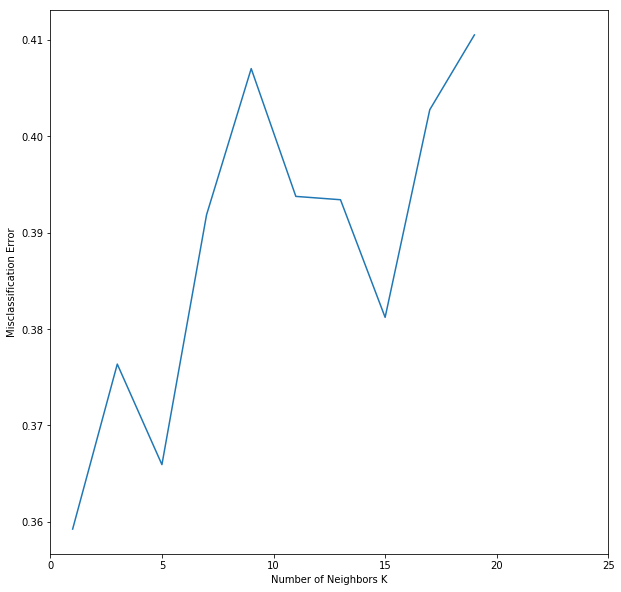

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()